### Task 1: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 2: Loading and Exploring the Data

In [2]:
xls=pd.ExcelFile("bank_term_deposit_marketing_analysis.xlsx")

In [4]:
xls.sheet_names
#we need loan history, marketing history, subscription history. 

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [6]:
client_info = pd.read_excel(xls,"CLIENT_INFO")
loan_history = pd.read_excel(xls,"LOAN_HISTORY")
marketing_history=pd.read_excel(xls,"MARKETING HISTORY")
subscription_history=pd.read_excel(xls,"SUBSCRIPTION HISTORY")

In [7]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [8]:
loan_history

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no
...,...,...,...,...,...
45206,48042,no,825,no,no
45207,48043,no,1729,no,no
45208,48044,no,5715,no,no
45209,48045,no,668,no,no


In [9]:
marketing_history

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...
45206,48042,cellular,17,nov,977,3,-1,0,unknown
45207,48043,cellular,17,nov,456,2,-1,0,unknown
45208,48044,cellular,17,nov,1127,5,184,3,success
45209,48045,telephone,17,nov,508,4,-1,0,unknown


In [10]:
subscription_history

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no
...,...,...
45206,48042,yes
45207,48043,yes
45208,48044,yes
45209,48045,no


In [11]:
df=pd.merge(client_info,loan_history,on=["ID"])
df=pd.merge(df,marketing_history,on=["ID"])
df=pd.merge(df,subscription_history,on=["ID"])
df.head()

#almost always remove id col for data_leakage issue.

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df=df.drop(["ID"],axis=1)

In [13]:
df.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Task 3: Data Prep & Start H2O

In [15]:
#u have to initiliaze h2o (teacher said h2o cluster, but i ll keep it more meaningful bcs idk what's h2o cluster.)
#h2o cluster just a place where all computations happens. thats all. also all data lives in there.

import h2o
h2o.init(max)

#h20 cluster uptime, bcs its started now it is 2sec. h20_cluster_free_memory could be increased via max_mem_size="10G" for
#10 gb for ex, its 3.5G for our pc default.

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from C:\Users\berka\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\berka\AppData\Local\Temp\tmpokes4c5u
  JVM stdout: C:\Users\berka\AppData\Local\Temp\tmpokes4c5u\h2o_berka_started_from_python.out
  JVM stderr: C:\Users\berka\AppData\Local\Temp\tmpokes4c5u\h2o_berka_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Istanbul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_berka_x5mjmy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.526 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [16]:
#h2o frame (its df for h2o automl)
h2o_df=h2o.H2OFrame(df)
#taking data from py memory to h2o cluster which uses java under the hood. to turn it into java memory to turn into h2oframe.
#its little bit technical, what is java memory?? nonetheless its turning pd df into h2o df format for automl to work.

#in real life after yr feature engineering and data_munging/cleaning steps is finished then u should do this step. and also
#h2oframe has some of the pd df capabilities but not all.

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [17]:
#for ex....
h2o_df.describe()
#enum is factor/categorical data format in java. as u can see h2oframe does a good job and turn every col wout a problem.
#if some categorical col turned as int or sth, u need to change that to catg.

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432809,,,,,1362.272057685082,,,,15.806418791886935,,258.1630797814693,2.7638406582468984,40.1978279622216,0.5803233726305563,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.61876204097539,,,,,3044.7658291685234,,,,8.32247615304459,,257.5278122651711,3.0980208832791796,100.1287459905981,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [ ]:
#df["certain_col"].asfactor() now yr col turned into enum.

In [20]:
#lastly we need to define our x,y x_train,y_train.

train,test=h2o_df.split_frame(ratios=[0.75])

x=train.columns
y="TERM_DEPOSIT"
x.remove(y)

### Task 4: Run H2O AutoML

In [22]:
from h2o.automl import H2OAutoML

In [23]:
df.TERM_DEPOSIT.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: TERM_DEPOSIT, dtype: float64

In [24]:
aml=H2OAutoML(max_runtime_secs=600,balance_classes=True,project_name="Final",stopping_metric="logloss",seed=1)

%time aml.train(x=x,y=y,training_frame=train)
#exclude algos=algos u dont want to test. "DeepLearning" for ex. for reproducibility u can set seed=1 but this is actaully
#redundant bcs when u have max_runtime_secs it makes yr rerun isnt reproducible. bcs sys resources on particular run isnt 
#same. (after saying that he adds seed=1 nonetheless:/) seed=1 just guarantees splits that are used is same, but it wont
#guarantee the same results on leaderboard.

#also when u re on yr own project, or at work u can also add hparam "max_models" and set sth like 15,20 models and training
#time will run out at 3600 sec (1 hr)

#to avoid overfitting u can define and monitor some metrics as well. such as logloss for binary classification or auc and if
#this metric doesnt change for couple iteration then we could stop that certain algo and move to next algo/model. this is
#"stopping_metrics" we ll set this as "logloss"

#there is also sort_metric and it ll sort the leaderboard of models based on the metric u specify. best auc, best accuracy
#best f1, best precision etc.

#u can also oversample minority class or undersample majority class via balance_class=True arg. or it can even use techs like
#SMOTE.

#also u could add project_name if u want to add more models after another iteration of training to the same project, u could
#just use same project_name. ez

#then u could time %time to check how much time does it exactly take. its imp to see that our x,y vals are colnames, they
#arent df/series. but when we put our dset algo can understand and do the necessary steps.

AutoML progress: |
21:35:42.279: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%
Wall time: 9min 17s


### Task 5: AutoML Leaderboard and Ensemble Exploration

In [25]:
#automl model has a leaderboard of models.u could see that. it also has 5 cv model perf. and this is by default.
#since we didnt define leaderboard_frame obj prev automl step for scoring and ranking the models automl leaderboard uses cv 
#metrics to rank the models. 


#DEFAULT perf metric for each ml task say binary classification, multiclass classification or regression will be sorted 
#internally and leaderboard will be sorted according to tthat metric. in case of binary classification, default ranking metrc
#is auc.

#leaderboard is a df (to be techniquely correct its a h2oframe).by default leaderboard shows 1st 10 models. to see all models
#u could use .nrows()

lb=aml.leaderboard
lb.head(rows=lb.nrows)

#we know what gradient boosting machines. which is our best model. and for same model, same train,test split same seed etc
#stackedEnsemble_bestoffamily_automl could be best model. lets learn what stacked_ensemble_best_family is.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_20200719_213542,0.934616,0.207331,0.614177,0.16319,0.256553,0.0658194
GBM_grid__1_AutoML_20200719_213542_model_7,0.934159,0.199068,0.623479,0.164341,0.251053,0.0630278
GBM_grid__1_AutoML_20200719_213542_model_3,0.934045,0.200833,0.618968,0.159293,0.251841,0.063424
GBM_grid__1_AutoML_20200719_213542_model_12,0.934035,0.208862,0.617789,0.167279,0.257169,0.0661359
GBM_grid__1_AutoML_20200719_213542_model_10,0.933807,0.199673,0.618335,0.180573,0.251472,0.0632381
StackedEnsemble_BestOfFamily_AutoML_20200719_213542,0.933182,0.226669,0.617815,0.167998,0.25945,0.0673142
GBM_grid__1_AutoML_20200719_213542_model_8,0.932711,0.200605,0.61521,0.177768,0.251828,0.0634174
GBM_2_AutoML_20200719_213542,0.932679,0.205113,0.616052,0.171893,0.254483,0.0647616
GBM_grid__1_AutoML_20200719_213542_model_4,0.932647,0.217462,0.608061,0.164141,0.259646,0.0674161
GBM_grid__1_AutoML_20200719_213542_model_14,0.932501,0.201413,0.611392,0.168312,0.252537,0.0637748


### If Best Model is StackedEnsemble Model (Generally the case)

In [1]:
#se=aml.leader
#metalearner=h2o.get_model(se.metalearner()["name"])

#this is steps for how to get best model in the ensemble, and what is the relative imp of each model within ensemble.
#this is how you get metaleaner. but bcs my best model isnt a stackedensemble i dont know how to use this codeblock.

In [3]:
#metalearner.varimp()

#variable importance. so its each model's imp on stacked ensemble. sadly my best model isnt stackedensemble and idk how to
#get stackedensemble. i only know how to use best model specs. so these 2  codeblocks are redundant. however here is one
#of the possible results on next codeblock.

### If Best Model isnt a StackedEnsemble, Here is How You can See Estimators in StackedEnsembleModel

In [39]:
#here is 1 more attempt to find stacked ensemble metalearner before move on.
se=h2o.get_model("StackedEnsemble_BestOfFamily_AutoML_20200719_213542")
metalearner=h2o.get_model(se.metalearner()["name"])

In [40]:
metalearner.varimp()
#yess. our most imp model is gbm one. now we dont need that png. we could check our best base model in our stacked_ensemble.

[('GBM_5_AutoML_20200719_213542', 0.8577539707670365, 1.0, 0.5874296997191778),
 ('DeepLearning_grid__1_AutoML_20200719_213542_model_1',
  0.3704987090578029,
  0.4319405350306787,
  0.25373469878961263),
 ('XRT_1_AutoML_20200719_213542',
  0.15329431844445132,
  0.17871595313906813,
  0.10498305868750946),
 ('GLM_1_AutoML_20200719_213542',
  0.07863448587611054,
  0.09167487246464456,
  0.05385254280370008),
 ('DRF_1_AutoML_20200719_213542', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [41]:
#we will talk about base learners more.
model=h2o.get_model('GBM_5_AutoML_20200719_213542')
model.model_performance(test)
#here is the perf of our base model. as u can see there are imp metrics on top, and other less imp metrics as a df.


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.06321670757410167
RMSE: 0.2514293291843688
LogLoss: 0.20181377046133805
Mean Per-Class Error: 0.12764603653085738
AUC: 0.9356432501561177
AUCPR: 0.6296605085475694
Gini: 0.8712865003122354

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21985664656499523: 


,,no,yes,Error,Rate
0,no,9188.0,731.0,0.0737,(731.0/9919.0)
1,yes,359.0,934.0,0.2776,(359.0/1293.0)
2,Total,9547.0,1665.0,0.0972,(1090.0/11212.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.219857,0.631508,233.0
1,max f2,0.088262,0.737834,306.0
2,max f0point5,0.346905,0.619454,179.0
3,max accuracy,0.346905,0.912326,179.0
4,max precision,0.926987,1.000000,0.0
5,max recall,0.001700,1.000000,395.0
6,max specificity,0.926987,1.000000,0.0
7,max absolute_mcc,0.193576,0.585012,248.0
8,max min_per_class_accuracy,0.091288,0.866317,304.0
9,max mean_per_class_accuracy,0.064925,0.872354,322.0



Gains/Lift Table: Avg response rate: 11.53 %, avg score:  8.69 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010078,0.737921,6.906351,6.906351,0.796460,0.803756,0.796460,0.803756,0.069606,0.069606,590.635074,590.635074,0.067287
1,2,0.020068,0.664341,6.813170,6.859967,0.785714,0.700874,0.791111,0.752544,0.068059,0.137664,581.316982,585.996735,0.132926
2,3,0.030057,0.600485,6.426058,6.715760,0.741071,0.634089,0.774481,0.713176,0.064192,0.201856,542.605789,571.576005,0.194194
3,4,0.040046,0.553339,6.271213,6.604871,0.723214,0.575096,0.761693,0.678733,0.062645,0.264501,527.121313,560.487084,0.253714
4,5,0.050036,0.511827,5.264722,6.337319,0.607143,0.531543,0.730838,0.649347,0.052591,0.317092,426.472213,533.731887,0.301869
5,6,0.100071,0.358156,4.714347,5.525833,0.543672,0.430172,0.637255,0.539760,0.235886,0.552978,371.434696,452.583292,0.511945
6,7,0.150018,0.215563,3.437554,4.830568,0.396429,0.285677,0.557075,0.455166,0.171694,0.724671,243.755386,383.056759,0.649563
7,8,0.200054,0.116807,2.210333,4.175217,0.254902,0.164128,0.481498,0.382374,0.110596,0.835267,121.033317,317.521694,0.718017
8,9,0.300036,0.032029,1.090682,3.147344,0.125781,0.064183,0.362961,0.276342,0.109049,0.944316,9.068180,214.734420,0.728266
9,10,0.400018,0.011651,0.348090,2.447687,0.040143,0.019368,0.282274,0.212113,0.034803,0.979118,-65.191007,144.768667,0.654590


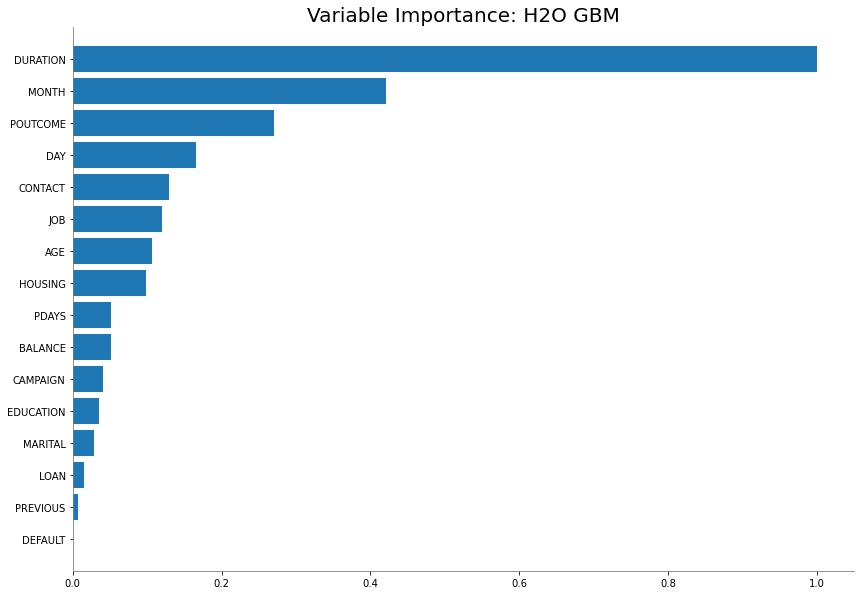

In [42]:
#here is how to get func doc. default shift+tab will be good. or model_varimp_plot? could help you out as well.
model.varimp_plot(num_of_features=20)

In [ ]:
#u now understand what automl means. u could say dif of google automl vs h2o automl (google_automl is deeplearning stuff,
#voice,img,txt recognition stuff but h2o automl is what comes to mind when u say automl, %95 of the projects on the market,
#table format dsets and classification,clustering,regression etc.)

#there is also h20 autoML app u can download, its much more complex and easier to use. Literally drag & drop. U just need
#to do FeatureEngineering and DataCleaning.